In [72]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scanpy as sc
import anndata as an
import scipy.io
import h5py

In [2]:
fpath = "/scratch/indikar_root/indikar1/cstansbu/HSC/scanpy/clustered.anndata.h5ad"

adata = sc.read_h5ad(fpath)
adata

AnnData object with n_obs × n_vars = 8562 × 14972
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_name', 'Chromosome', 'Start', 'End', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'ensembl_id'
    uns: 'HSC_vs_FB', 'HSC_vs_FB_pure', 'clusters', 'fb_vs_hsc_up', 'go_annotations', 'hsc_v_fib_up', 'hvg', 'log1p', 'neighbors', 'panglaodb', 'pca', 'scenic_transcription_factors', 'scrublet', 'tabula_sapiens_deg', 'umap', 'v5_tags'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'filtered_counts', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [3]:
adata.var_names = adata.var['gene_name'].values
adata

AnnData object with n_obs × n_vars = 8562 × 14972
    obs: 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_name', 'Chromosome', 'Start', 'End', 'Strand', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'ensembl_id'
    uns: 'HSC_vs_FB', 'HSC_vs_FB_pure', 'clusters', 'fb_vs_hsc_up', 'go_annotations', 'hsc_v_fib_up', 'hvg', 'log1p', 'neighbors', 'panglaodb', 'pca', 'scenic_transcription_factors', 'scrublet', 'tabula_sapiens_deg', 'umap', 'v5_tags'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'filtered_counts', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [ ]:
genes = [
    'GATA2',
    'GFI1B',
    'FOS',
    'STAT5A',
    'REL',
]

df = adata[

In [200]:
[x for x in adata.var_names if "CD9" in x]

['CD96', 'CD9', 'CD99']

In [209]:
genes = [
    "CD34",
    "CD164",
    "PTPRC",
    "THY1",
    "MLLT3",
    "CRHBP",
    "DUSP1",
]

pdf = adata[:, genes].to_df()
pdf = pdf.astype(bool).astype(int)
pdf = pdf.sum(axis=0).reset_index()
pdf.columns = ['Gene', 'n Cells']
pdf['Percent'] = (pdf['n Cells'] / len(df)) * 100
pdf['Percent'] = pdf['Percent'].round(2).astype(str)

print(pdf.to_latex(index=False))

\begin{tabular}{lrl}
\toprule
Gene & n Cells & Percent \\
\midrule
CD34 & 2457 & 28.7 \\
CD164 & 2029 & 23.7 \\
PTPRC & 2058 & 24.04 \\
THY1 & 2260 & 26.4 \\
MLLT3 & 1705 & 19.91 \\
CRHBP & 2287 & 26.71 \\
DUSP1 & 2357 & 27.53 \\
\bottomrule
\end{tabular}



In [26]:
# percent of cells expressing each

pdf = df.copy()
pdf = pdf.astype(bool).astype(int)
pdf = pdf.sum(axis=0).reset_index()
pdf.columns = ['Gene', 'n Cells']
pdf['Percent'] = (pdf['n Cells'] / len(df)) * 100

# add v5 tags as column

v5 = adata.uns['v5_tags'][['V5-FOS', 'V5-GATA2','V5-REL', 'V5-STAT5A']]
v5.columns = [x.replace("V5-", "") for x in v5.columns]
v5 = v5.astype(bool).astype(int)
v5 = v5.sum(axis=0).reset_index()
v5.columns = ['Gene', 'n Cells (V5)']

v5['Percent (V5)'] = (v5['n Cells (V5)'] / len(df)) * 100


pdf = pd.merge(pdf,v5, how='left')
pdf = pdf.fillna(0)

pdf['n Cells (V5)'] = pdf['n Cells (V5)'].astype(int).astype(str)
pdf['Percent (V5)'] = pdf['Percent (V5)'].round(2).astype(str)
pdf['Percent'] = pdf['Percent'].round(2).astype(str)

print(pdf.to_latex(index=False))


\begin{tabular}{lrlll}
\toprule
Gene & n Cells & Percent & n Cells (V5) & Percent (V5) \\
\midrule
GATA2 & 1502 & 17.54 & 148 & 1.73 \\
GFI1B & 851 & 9.94 & 0 & 0.0 \\
FOS & 583 & 6.81 & 104 & 1.21 \\
STAT5A & 406 & 4.74 & 5 & 0.06 \\
REL & 451 & 5.27 & 16 & 0.19 \\
\bottomrule
\end{tabular}



In [27]:
# the number of cells expressing combinations

pdf = df.copy()
pdf = pdf.astype(bool).astype(int)


pdf = pdf.sum(axis=1)
pdf = pdf.value_counts().reset_index()
pdf.columns = ['n TF', 'n Cells']
pdf['Percent'] = pdf['n Cells'] / len(df)

pdf['Percent'] = pdf['Percent'].round(3).astype(str)
print(pdf.to_latex(index=False))

\begin{tabular}{rrl}
\toprule
n TF & n Cells & Percent \\
\midrule
0 & 5441 & 0.635 \\
1 & 2514 & 0.294 \\
2 & 543 & 0.063 \\
3 & 63 & 0.007 \\
4 & 1 & 0.0 \\
\bottomrule
\end{tabular}



# Hard-wired Genome

In [83]:
fpath = "/nfs/turbo/umms-indikar/shared/projects/HWG/HWG.scanpy.h5ad"
hwg = sc.read_h5ad(fpath)

hwg

AnnData object with n_obs × n_vars = 19198 × 19198
    obs: 'gene_name', 'is_TF'
    var: 'gene_name', 'is_TF'

In [213]:
# first order-interactions
genes = [
    'GATA2',
    'GFI1B',
    'FOS',
    'STAT5A',
    'REL',
]

id2name = dict(zip(hwg.var.index, hwg.var['gene_name'].values))

genes = adata.var[adata.var['gene_name'].isin(genes)]

foi = hwg[:, genes['ensembl_id'].values].to_df()
foi.columns = genes['gene_name'].values

foi = foi.astype(bool).astype(int)

# filter out genes which are not first-order interactions in HWG
foi_raw = foi[foi.sum(axis=1) > 0]

print(foi_raw.sum(axis=0))
print()

foi = foi_raw.copy()
foi['sum'] = foi.sum(axis=1)
foi = foi.sort_values(by='sum', ascending=False)
foi = foi.reset_index()
foi['gene_name'] = foi['gene_id'].map(id2name)

# drop those not expressed in our data
foi = foi[foi['gene_name'].isin(adata.var_names)]

# get the expression of all genes
pdf = adata.to_df()
pdf = pdf.astype(bool).astype(int)
pdf = pdf.sum(axis=0).reset_index()
pdf.columns = ['gene_name', 'n_cells']
pdf['percent'] = (pdf['n_cells'] / len(df)) * 100

# merge with the FOI
foi = pd.merge(foi, pdf,
               how='left',
               left_on='gene_name',
               right_on='gene_name')

foi = foi.sort_values(by='percent', ascending=False)

foi.head()

REL       1655
GATA2     1849
GFI1B      648
FOS       2986
STAT5A    1740
dtype: int64



,gene_id,REL,GATA2,GFI1B,FOS,STAT5A,sum,gene_name,n_cells,percent
2044,ENSG00000143801,0,0,0,1,0,1,PSEN2,8544,99.789769
3541,ENSG00000065802,1,0,0,0,0,1,ASB1,8533,99.661294
2748,ENSG00000167552,0,0,0,1,0,1,TUBA1A,8529,99.614576
308,ENSG00000127528,1,1,0,1,1,4,KLF2,8508,99.369306
3745,ENSG00000243772,0,0,0,0,1,1,KIR2DL3,8504,99.322588


In [238]:
# overview table
tfs = hwg.var[hwg.var['is_TF'] == "1"].index

foi_raw['is_TF'] = np.isin(foi_raw.index, tfs)
foi_raw['is_TF'].value_counts()

table = foi_raw.groupby('is_TF').sum()
print(table.T.to_latex())



\begin{tabular}{lrr}
\toprule
is_TF & False & True \\
\midrule
REL & 1395 & 260 \\
GATA2 & 1235 & 614 \\
GFI1B & 473 & 175 \\
FOS & 2495 & 491 \\
STAT5A & 1457 & 283 \\
is_tf & 0 & 0 \\
\bottomrule
\end{tabular}



In [147]:
# look at common targets of all 5 TFS
n_genes = 10

columns = [
    'gene_name',
    'n_cells',
    'percent',
]

table = foi[foi['sum'] == 5]
table = table.head(n_genes)
table = table[columns]


table['percent'] = table['percent'].round(2).astype(str)
print(table.to_latex(index=False))



\begin{tabular}{lrl}
\toprule
gene_name & n_cells & percent \\
\midrule
NKX2-5 & 8422 & 98.36 \\
CDKN1A & 8020 & 93.67 \\
JAK2 & 7387 & 86.28 \\
KLF1 & 7112 & 83.06 \\
CTNNB1 & 6256 & 73.07 \\
STAT5B & 5106 & 59.64 \\
PECAM1 & 5083 & 59.37 \\
H3-7 & 4806 & 56.13 \\
ALK & 4722 & 55.15 \\
SPIB & 4500 & 52.56 \\
\bottomrule
\end{tabular}



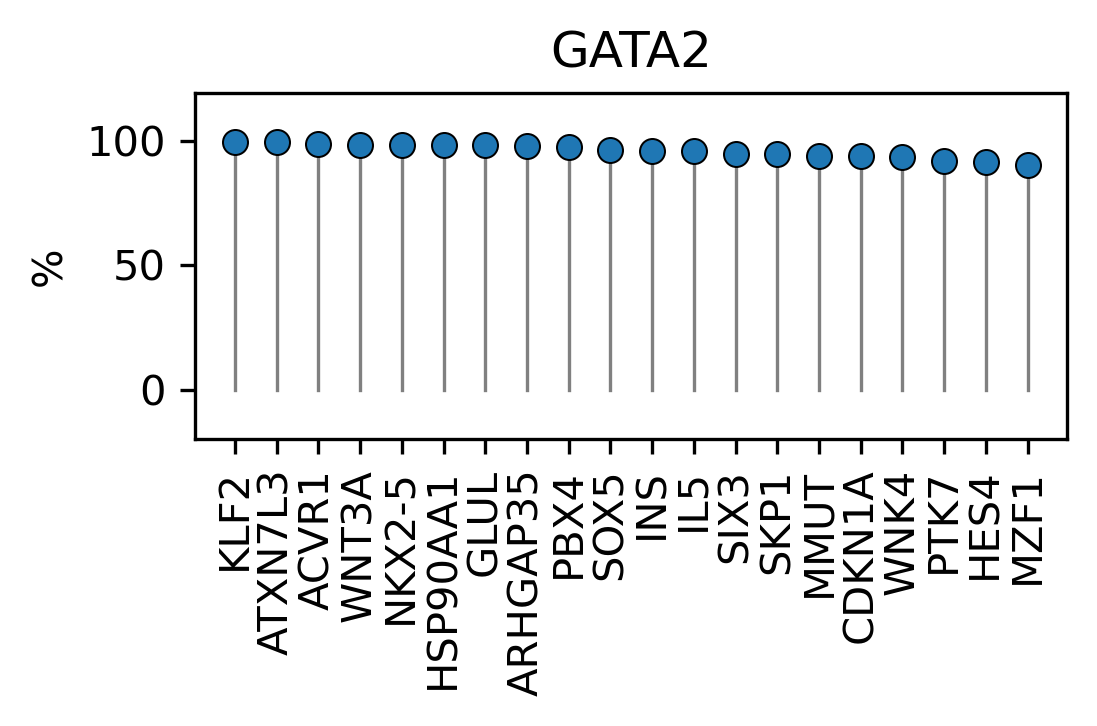

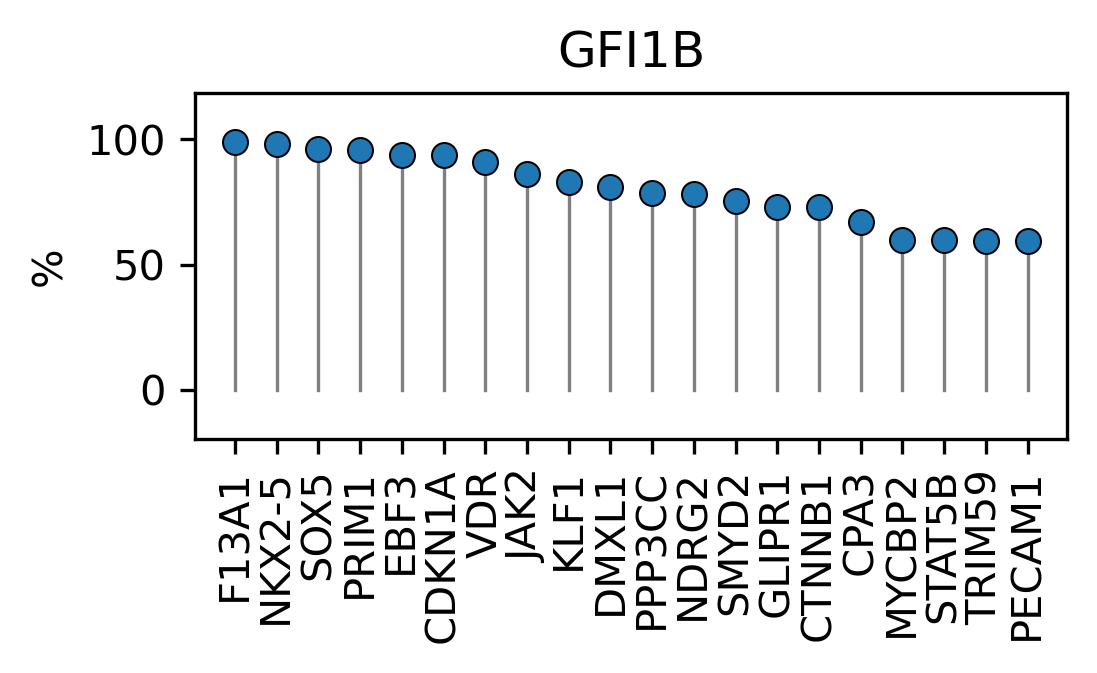

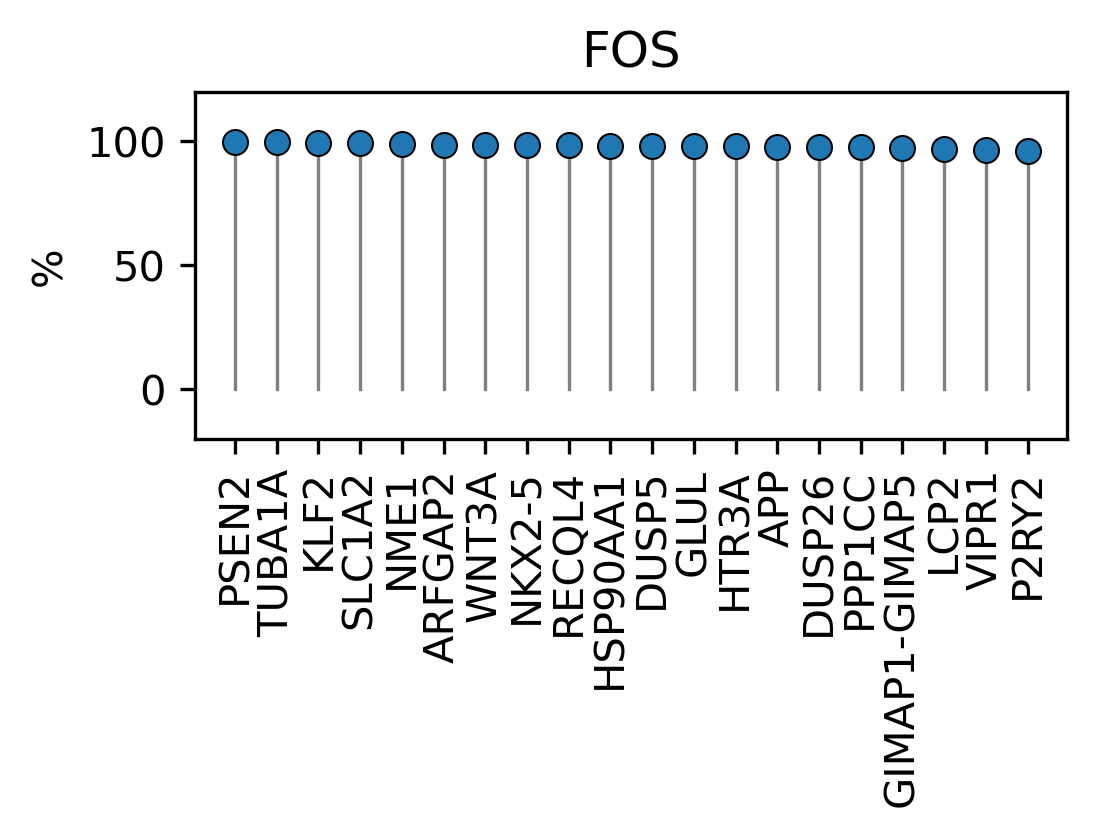

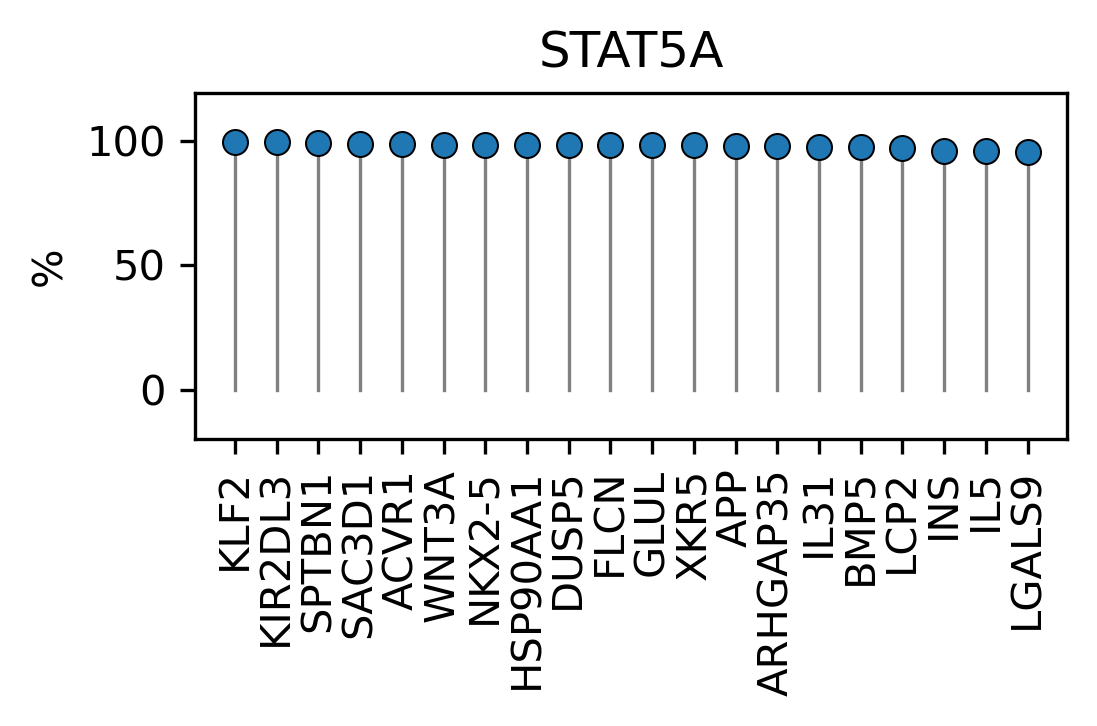

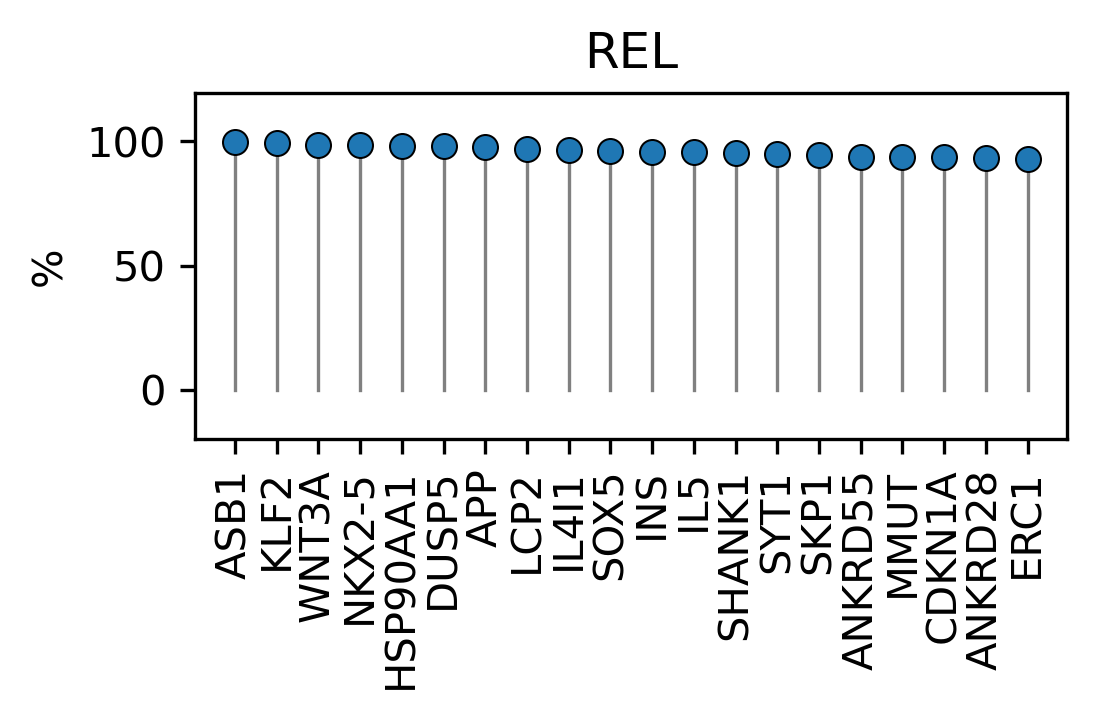

In [174]:
# look at specific TFs

n_genes = 20

genes = [
    'GATA2',
    'GFI1B',
    'FOS',
    'STAT5A',
    'REL',
]

columns = [
    'gene_name',
    'percent',
]


for tf in genes:
    table = foi[foi[tf] == 1]
    table = table.head(n_genes)
    table = table[columns]
    
    plt.rcParams['figure.dpi'] = 300
    plt.rcParams['figure.figsize'] = 3.75, 1.5
    
    sns.scatterplot(data=table, 
                    x='gene_name',
                    ec='k',
                    y='percent',
                    zorder=5)
    
    # Vertical lines connecting points to the x-axis
    for x, y in zip(range(len(table['gene_name'])), table['percent']):
        plt.plot([x, x], 
                 [0, y],
                 color='gray', 
                 linestyle='-', 
                 zorder=0,
                 linewidth=0.8)

    plt.ylabel('%')
    plt.xlabel('')
    plt.gca().tick_params(axis='x', rotation=90)
    plt.margins(x=0.05, y=0.2)
    plt.title(tf)
    plt.show()

